# Data Analysis for "Making Formulog Fast"

This Jupyter Notebook analyzes our experimental data.
It calculates the numbers reported in the paper, and also generates the figures and tables.

In [171]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [172]:
import __main__ as main

running_as_script = hasattr(main, "__file__")

if running_as_script:
    if len(sys.argv) != 3:
        print(f"usage: {sys.argv[0]} CSV_FILE TIMEOUT")
        exit(1)
    results_file = sys.argv[1]
    timeout = int(sys.argv[2])
else:
    results_file = "results.csv"
    timeout = 1800

## Data Wrangling

In [173]:
data = pd.read_csv(results_file)
data.head()

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,smt_calls,smt_time,smt_mode,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work,parallelism
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.06,622.0,0.40992,...,95749,1400.84,push-pop,1400.84,0.0,0.318543,0.266951,0,14.16749,1
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749,1468.19,push-pop,1468.19,0.0,0.290978,0.294516,0,14.16749,8
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749,1624.09,push-pop,1624.09,0.0,0.276017,0.309477,0,14.16749,16
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749,1861.27,push-pop,1861.27,0.0,0.264307,0.321187,0,14.16749,24
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749,2407.82,push-pop,2407.82,0.0,0.252825,0.332669,0,14.16749,32


In [174]:
def get_time(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_time"]
    else:
        val = row["execute_time"]
    if pd.isnull(val):
        val = timeout
    return val

In [175]:
data["time"] = data.apply(get_time, axis=1)

In [176]:
def get_cpu(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_cpu"]
    else:
        val = row["execute_cpu"]
    return val

In [177]:
data["cpu"] = data.apply(get_cpu, axis=1)

In [178]:
def get_mem(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_mem"]
    else:
        val = row["execute_mem"]
    return val

In [179]:
data["mem"] = data.apply(get_mem, axis=1)

In [180]:
data

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work,parallelism,time,cpu,mem
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.06,622.0,0.40992,...,1400.840,0.000000,0.318543,0.266951,0,14.167490,1,1428.64,100,0.575100
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1468.190,0.000000,0.290978,0.294516,0,14.167490,8,196.52,780,0.587560
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1624.090,0.000000,0.276017,0.309477,0,14.167490,16,116.13,1492,0.597756
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1861.270,0.000000,0.264307,0.321187,0,14.167490,24,93.29,2164,0.621652
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,2407.820,0.000000,0.252825,0.332669,0,14.167490,32,88.36,2959,0.759228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,475.192,0.023544,5.157937,0.029075,274,305.286071,16,93.20,1641,6.863284
80,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,540.583,0.021093,5.151587,0.035425,330,305.285921,24,85.91,2449,7.022816
81,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,590.341,0.045893,5.150110,0.036902,339,305.286532,32,81.58,3202,7.158372
82,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,697.108,0.045346,5.145650,0.041362,376,305.287257,40,78.59,4013,7.283428


In [181]:
# Rename modes according to what we use in the paper
new_mode_names = {
    "interpret": "interpret",
    "interpret-reorder": "interpret",
    "interpret-unbatched": "interpret-eager",
    "compile": "compile",
    "compile-reorder": "compile",
    "compile-unbatched": "compile-eager",
    "klee": "klee",
    "cbmc": "cbmc",
    "scuba": "scuba",
}

data["mode"] = data["mode"].map(new_mode_names)

In [182]:
medians = data.groupby(["case_study", "benchmark", "mode", "parallelism"]).agg(
    {
        "smt_time": ["median"],
        "smt_cache_clears": ["median"],
        "time": ["median"],
        "work": ["median"],
        "cpu": ["median"],
        "mem": ["median"],
        "smt_cache_misses": ["median"],
    }
)

In [183]:
medians.columns = [
    "median_smt_time",
    "median_smt_cache_clears",
    "median_time",
    "median_work",
    "median_cpu",
    "median_mem",
    "median_smt_cache_misses",
]
medians = medians.reset_index()

In [184]:
medians

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses
0,dminor,all-100,compile,1,1400.840000,0.0,1428.64,14.167490,100.0,0.575100,0.266951
1,dminor,all-100,compile,8,1468.190000,0.0,196.52,14.167490,780.0,0.587560,0.294516
2,dminor,all-100,compile,16,1624.090000,0.0,116.13,14.167490,1492.0,0.597756,0.309477
3,dminor,all-100,compile,24,1861.270000,0.0,93.29,14.167490,2164.0,0.621652,0.321187
4,dminor,all-100,compile,32,2407.820000,0.0,88.36,14.167490,2959.0,0.759228,0.332669
...,...,...,...,...,...,...,...,...,...,...,...
79,symex,sort-7,compile-eager,16,475.215544,274.0,93.20,305.286071,1641.0,6.863284,0.029075
80,symex,sort-7,compile-eager,24,540.604093,330.0,85.91,305.285921,2449.0,7.022816,0.035425
81,symex,sort-7,compile-eager,32,590.386893,339.0,81.58,305.286532,3202.0,7.158372,0.036902
82,symex,sort-7,compile-eager,40,697.153346,376.0,78.59,305.287257,4013.0,7.283428,0.041362


In [185]:
medians["mode_x_parallelism"] = list(zip(medians["mode"], medians["parallelism"]))
medians.head()

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism
0,dminor,all-100,compile,1,1400.84,0.0,1428.64,14.16749,100.0,0.575100,0.266951,"(compile, 1)"
1,dminor,all-100,compile,8,1468.19,0.0,196.52,14.16749,780.0,0.587560,0.294516,"(compile, 8)"
2,dminor,all-100,compile,16,1624.09,0.0,116.13,14.16749,1492.0,0.597756,0.309477,"(compile, 16)"
3,dminor,all-100,compile,24,1861.27,0.0,93.29,14.16749,2164.0,0.621652,0.321187,"(compile, 24)"
4,dminor,all-100,compile,32,2407.82,0.0,88.36,14.16749,2959.0,0.759228,0.332669,"(compile, 32)"


In [186]:
def stats(df, process_row):
    def compute(df):
        res = df.apply(process_row, axis=1).agg(["mean", "min", "median", "max"])
        print(res)

    print("all:")
    compute(df)
    print("\ndminor:")
    compute(df[df["case_study"] == "dminor"])
    print("\nscuba:")
    compute(df[df["case_study"] == "scuba"])
    print("\nsymex:")
    compute(df[df["case_study"] == "symex"])


def speedup(df, mode, baseline):
    """Return the speedup of `mode` relative to `baseline`, calculated as
    `baseline` divided by `mode`"""
    def process_row(row):
        if not pd.isnull(row[mode]):
            return row[baseline] / row[mode]

    return stats(df, process_row)


def widen(df, val, columns="mode_x_parallelism"):
    return df.pivot(
        index=["case_study", "benchmark"], columns=columns, values=val
    ).reset_index()

In [187]:
times = widen(medians, "median_time")
smt_times = widen(medians, "median_smt_time")
work = widen(medians, "median_work")
cpu = widen(medians, "median_cpu")
mem = widen(medians, "median_mem")
smt_cache_misses = widen(medians, "median_smt_cache_misses")
times.head()

mode_x_parallelism,case_study,benchmark,"(compile, 1)","(compile, 8)","(compile, 16)","(compile, 24)","(compile, 32)","(compile, 40)","(compile, 48)","(compile-eager, 1)","(compile-eager, 8)","(compile-eager, 16)","(compile-eager, 24)","(compile-eager, 32)","(compile-eager, 40)","(compile-eager, 48)"
0,dminor,all-100,1428.64,196.52,116.13,93.29,88.36,91.79,100.18,1379.57,167.95,91.54,68.33,67.57,66.84,69.70
1,symex,interp-6,865.91,463.96,462.67,464.12,483.39,472.60,489.49,198.77,27.56,16.74,14.58,13.62,15.60,13.17
2,symex,numbrix-sat,4.11,16.08,24.52,26.67,10.23,9.54,20.85,5.52,11.02,18.10,16.21,19.66,26.39,26.20
3,symex,prioqueue-6,231.76,93.92,95.84,98.16,100.18,103.41,115.00,152.29,27.93,23.05,21.71,20.15,19.04,18.85
4,symex,shuffle-5,22.47,4.38,3.84,3.98,3.74,3.81,4.29,23.08,3.31,2.27,2.04,1.84,1.94,2.02


In [188]:
def scaling_speedup(row, baseline_nthreads=1):
    mode = row["mode"]
    entry = times[(times["benchmark"] == row["benchmark"]) & (times["case_study"] == row["case_study"])]
    baseline = entry[(mode, baseline_nthreads)].item()
    return baseline / row["median_time"]

medians["speedup"] = medians.apply(scaling_speedup, axis=1)
medians.head()

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism,speedup
0,dminor,all-100,compile,1,1400.84,0.0,1428.64,14.16749,100.0,0.575100,0.266951,"(compile, 1)",1.000000
1,dminor,all-100,compile,8,1468.19,0.0,196.52,14.16749,780.0,0.587560,0.294516,"(compile, 8)",7.269693
2,dminor,all-100,compile,16,1624.09,0.0,116.13,14.16749,1492.0,0.597756,0.309477,"(compile, 16)",12.302075
3,dminor,all-100,compile,24,1861.27,0.0,93.29,14.16749,2164.0,0.621652,0.321187,"(compile, 24)",15.313967
4,dminor,all-100,compile,32,2407.82,0.0,88.36,14.16749,2959.0,0.759228,0.332669,"(compile, 32)",16.168402


In [189]:
def smt_heavy(df):
    return df[(df["case_study"] != "scuba")]

In [190]:
times

mode_x_parallelism,case_study,benchmark,"(compile, 1)","(compile, 8)","(compile, 16)","(compile, 24)","(compile, 32)","(compile, 40)","(compile, 48)","(compile-eager, 1)","(compile-eager, 8)","(compile-eager, 16)","(compile-eager, 24)","(compile-eager, 32)","(compile-eager, 40)","(compile-eager, 48)"
0,dminor,all-100,1428.64,196.52,116.13,93.29,88.36,91.79,100.18,1379.57,167.95,91.54,68.33,67.57,66.84,69.70
1,symex,interp-6,865.91,463.96,462.67,464.12,483.39,472.60,489.49,198.77,27.56,16.74,14.58,13.62,15.60,13.17
2,symex,numbrix-sat,4.11,16.08,24.52,26.67,10.23,9.54,20.85,5.52,11.02,18.10,16.21,19.66,26.39,26.20
3,symex,prioqueue-6,231.76,93.92,95.84,98.16,100.18,103.41,115.00,152.29,27.93,23.05,21.71,20.15,19.04,18.85
4,symex,shuffle-5,22.47,4.38,3.84,3.98,3.74,3.81,4.29,23.08,3.31,2.27,2.04,1.84,1.94,2.02
5,symex,sort-7,795.68,122.46,81.94,71.75,70.98,69.20,71.75,592.49,113.47,93.20,85.91,81.58,78.59,75.36


In [191]:
os.makedirs("figures", exist_ok=True)

In [192]:
# Full scaling table

nthreads = (1, 8, 16, 24, 32, 40, 48)

def make_table_row(row, acc):
    def time(mode, baseline):
        if pd.isnull(row[mode]):
            return "-"
        if row[mode] == timeout:
            return "TO"
        else:
            t = f"{row[mode]:0.2f}"
            bf = t == best
            # if baseline != None and not pd.isnull(baseline):
            #     speedup = baseline / row[mode]
            #     t = f"{t} ({speedup:0.1f}$\\times$)"
            if bf:
                t = "{\\bf %s}" % t
            return t

    times = [row[(mode, j)] for mode in ("compile", "compile-eager") for j in nthreads]
    best = min(t for t in times if not pd.isnull(t))
    best = f"{best:0.2f}"

    s = []
    s.append(f"{row['case_study']} & {row['benchmark']}")
    for i, j in enumerate(nthreads):
        baseline = row[("compile", nthreads[0])] if i > 0 else None 
        s.extend([" & ", time(("compile", j), baseline)])
    s.extend([" &"])
    for i, j in enumerate(nthreads):
        baseline = row[("compile-eager", nthreads[0])] if i > 0 else None 
        s.extend([" & ", time(("compile-eager", j), baseline)])
    s.append(r"\\")
    acc.append("".join(s))


nconfigs = len(nthreads)
s = []
s.append(r"\documentclass{article}")
s.append(r"\usepackage{colortbl}")
s.append(r"\usepackage{multirow}")
s.append(r"\usepackage{color}")
s.append(r"\usepackage{booktabs}")
s.append(r"\usepackage{pdflscape}")
s.append(r"\definecolor{Gray}{gray}{0.9}")
s.append(r"\begin{document}")
s.append(r"\scriptsize")
s.append(r"\begin{landscape}")
s.append(r"\begin{tabular}{ll" + "r" * (2 * nconfigs + 1) + r"}")
s.append(r"\toprule")
s.append(
    r"& & \multicolumn{" + str(nconfigs) + r"}{c}{Semi-naive evaluation} & & \multicolumn{" + str(nconfigs) + r"}{c}{Eager evaluation} \\"
)
line1_end = 3 + nconfigs - 1
line2_start = line1_end + 2
line2_end = line2_start + nconfigs - 1
s.append(r"\cline{3-" + str(line1_end) + r"} \cline{" + str(line2_start) + "-" + str(line2_end) + r"}")
thread_header = " ".join([f"& {x}" for x in nthreads])
s.append(
    r"& & \multicolumn{" + str(nconfigs) + r"}{c}{\# threads} & & \multicolumn{" + str(nconfigs) + r"}{c}{\# threads}\\"
)
s.append(
    r"Case study & Benchmark" + thread_header + "& " + thread_header + r"\\"
)
s.append(r"\midrule")
times.apply(lambda row: make_table_row(row, s), axis=1)
s.append(r"\bottomrule")
s.append(r"\end{tabular}")
s.append(r"\end{landscape}")
s.append(r"\end{document}")
with open(os.path.join("figures", "tab_scaling_all.tex"), "w") as f:
    f.write("\n".join(s))

In [193]:
# From https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 395.8225

<Figure size 640x480 with 0 Axes>

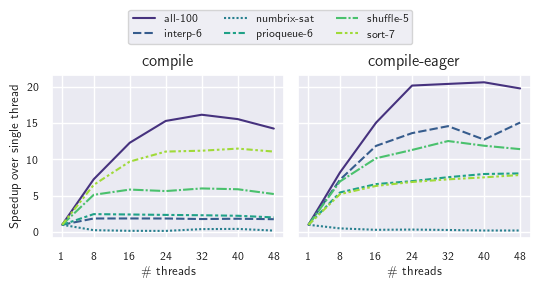

In [202]:
plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": not running_as_script,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
bms = ["all-100", "interp-6", "numbrix-sat", "prioqueue-6", "shuffle-5", "sort-7"]
sns.lineplot(
    data=medians[medians["mode"] == "compile"],
    y="speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax1,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
)
ax1.set(ylabel=r"Speedup over single thread ($\times$)", xlabel=r"\# threads", xticks=nthreads, title="compile")

sns.lineplot(
    data=medians[medians["mode"] == "compile-eager"],
    y="speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax2,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
    legend=None,
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel=r"\# threads", xticks=nthreads, title="compile-eager")

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax1.get_legend().remove()
(inch_width, _) = set_size(width)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(os.path.join("figures", "scaling_fig.pdf"), bbox_inches="tight", dpi=100)

In [195]:
speedup(times, ("compile-eager", 1), ("compile", 1))

all:
mean      1.662470
min       0.744565
median    1.189256
max       4.356342
dtype: float64

dminor:
mean      1.035569
min       1.035569
median    1.035569
max       1.035569
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.787851
min       0.744565
median    1.342942
max       4.356342
dtype: float64


In [196]:
speedup(smt_times, ("compile-eager", 1), ("compile", 1))

all:
mean      2.093777
min       0.715295
median    1.552518
max       5.214651
dtype: float64

dminor:
mean      1.040618
min       1.040618
median    1.040618
max       1.040618
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      2.304409
min       0.715295
median    2.045009
max       5.214651
dtype: float64


In [198]:
def smt_scaling_speedup(row, baseline_nthreads=1):
    mode = row["mode"]
    entry = smt_times[(times["benchmark"] == row["benchmark"]) & (smt_times["case_study"] == row["case_study"])]
    baseline = entry[(mode, baseline_nthreads)].item()
    return baseline / row["median_smt_time"]

medians["smt_speedup"] = medians.apply(smt_scaling_speedup, axis=1)
medians.head(20)

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism,speedup,smt_speedup
0,dminor,all-100,compile,1,1400.840000,0.0,1428.64,14.167490,100.0,0.575100,0.266951,"(compile, 1)",1.000000,1.000000
1,dminor,all-100,compile,8,1468.190000,0.0,196.52,14.167490,780.0,0.587560,0.294516,"(compile, 8)",7.269693,0.954127
2,dminor,all-100,compile,16,1624.090000,0.0,116.13,14.167490,1492.0,0.597756,0.309477,"(compile, 16)",12.302075,0.862538
3,dminor,all-100,compile,24,1861.270000,0.0,93.29,14.167490,2164.0,0.621652,0.321187,"(compile, 24)",15.313967,0.752626
4,dminor,all-100,compile,32,2407.820000,0.0,88.36,14.167490,2959.0,0.759228,0.332669,"(compile, 32)",16.168402,0.581788
5,dminor,all-100,compile,40,3011.150000,0.0,91.79,14.167490,3599.0,0.998228,0.343928,"(compile, 40)",15.564223,0.465218
6,dminor,all-100,compile,48,3727.460000,0.0,100.18,14.167490,4251.0,1.217424,0.355690,"(compile, 48)",14.260731,0.375816
7,dminor,all-100,compile-eager,1,1346.161817,0.0,1379.57,12.499511,100.0,0.603776,0.431531,"(compile-eager, 1)",1.000000,1.000000
8,dminor,all-100,compile-eager,8,1303.304300,0.0,167.95,12.921539,802.0,0.628172,0.431762,"(compile-eager, 8)",8.214171,1.032884
9,dminor,all-100,compile-eager,16,1400.070500,0.0,91.54,12.931799,1578.0,0.656400,0.431944,"(compile-eager, 16)",15.070679,0.961496


<Figure size 640x480 with 0 Axes>

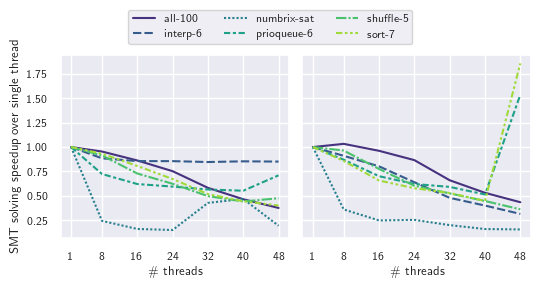

In [201]:
plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": not running_as_script,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
bms = ["all-100", "interp-6", "numbrix-sat", "prioqueue-6", "shuffle-5", "sort-7"]
sns.lineplot(
    data=medians[medians["mode"] == "compile"],
    y="smt_speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax1,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
)
ax1.set(ylabel="SMT solving speedup over single thread", xlabel=r"\# threads", xticks=nthreads)

sns.lineplot(
    data=medians[medians["mode"] == "compile-eager"],
    y="smt_speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax2,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
    legend=None,
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel=r"\# threads", xticks=nthreads)

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax1.get_legend().remove()
(inch_width, _) = set_size(width)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(os.path.join("figures", "smt_scaling_fig.pdf"), bbox_inches="tight", dpi=100)